In [2]:
from google.colab import files
uploaded = files.upload()

Saving budget_export.csv to budget_export.csv


In [17]:
import pandas as pd

df=pd.read_csv("/content/budget_export.csv")

In [18]:
df.columns

Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created'],
      dtype='object')

In [19]:
df.describe()

,score,num_comments,created
count,500.000000,500.000000,5.000000e+02
mean,5.668000,7.224000,1.659653e+09
std,6.659314,7.183385,7.835585e+06
min,0.000000,0.000000,1.645721e+09
25%,2.000000,2.000000,1.652814e+09
50%,3.000000,5.000000,1.660049e+09
75%,7.000000,10.000000,1.666383e+09
max,59.000000,55.000000,1.672055e+09


In [21]:
df.shape

(500, 8)

In [22]:
df.isnull().sum()

title            0
score            0
id               0
subreddit        0
url              0
num_comments     0
body            54
created          0
dtype: int64

In [23]:
df.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Excel for 4 banks and multiple accounts?,3,zvlimd,budget,https://www.reddit.com/r/budget/comments/zvlim...,1,Tl;dr at the end!\r\nSo we currently have an e...,1.672055e+09
1,What’s your favorite budgeting hack or strateg...,8,zv08l2,budget,https://www.reddit.com/r/budget/comments/zv08l...,7,NaN,1.671982e+09
2,How to budget?,5,zuw9ap,budget,https://www.reddit.com/r/budget/comments/zuw9a...,8,There's pages online but they're all general. ...,1.671967e+09
3,What is your New Year's Resolution,8,zuekox,budget,https://www.reddit.com/r/budget/comments/zueko...,21,First post M 63 never had a new year resolutio...,1.671903e+09
4,Evolution of my Budgeting Spreadsheet,16,zu317x,budget,https://www.reddit.com/r/budget/comments/zu317...,3,I’ve been updating my budgeting spreadsheet th...,1.671861e+09


In [24]:
df.dropna(inplace=True)
df.isnull().sum()

title           0
score           0
id              0
subreddit       0
url             0
num_comments    0
body            0
created         0
dtype: int64

In [26]:
df.shape

(446, 8)

In [25]:
df.describe()

,score,num_comments,created
count,446.000000,446.000000,4.460000e+02
mean,5.340807,7.073991,1.659815e+09
std,5.740884,6.867045,7.835569e+06
min,0.000000,0.000000,1.645721e+09
25%,2.000000,2.250000,1.653409e+09
50%,3.000000,5.000000,1.660176e+09
75%,7.000000,10.000000,1.666541e+09
max,43.000000,55.000000,1.672055e+09


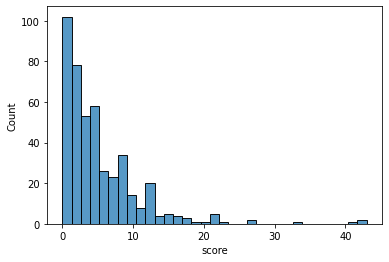

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.histplot(x='score', data=df, )
plt.show()

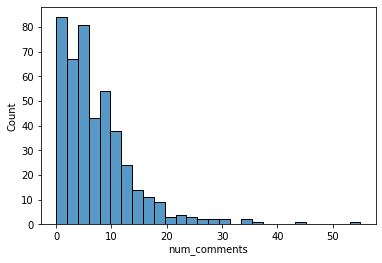

In [28]:
sns.histplot(x='num_comments', data=df, )
plt.show()

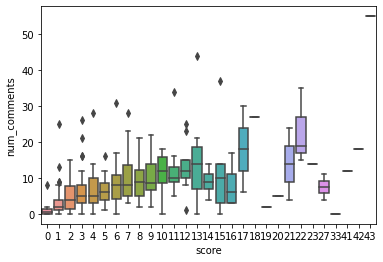

In [29]:
sns.boxplot( x="score", y='num_comments', data=df, )
plt.show()

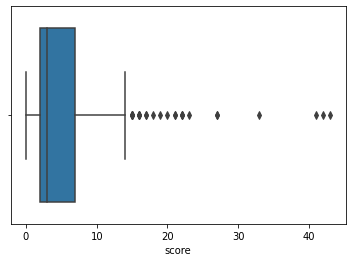

In [30]:
sns.boxplot(x='score', data=df)
plt.show()

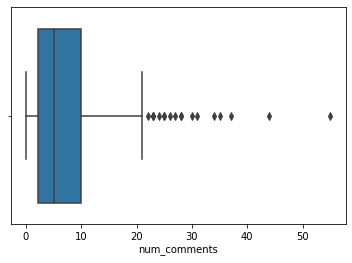

In [31]:
sns.boxplot(x='num_comments', data=df)
plt.show()

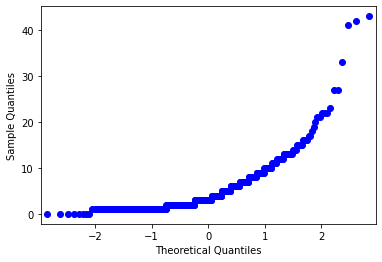

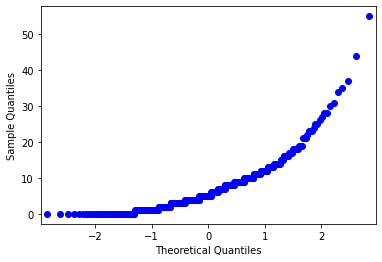

In [32]:
import statsmodels.api as sm

sm.qqplot(df['score'])
sm.qqplot(df['num_comments'])
plt.show()

In [37]:
df['created']=(pd.to_datetime(df['created'],unit='s'))

In [38]:
df.created[0]

Timestamp('2022-12-26 11:43:20')

In [39]:
df.columns

Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created'],
      dtype='object')

In [40]:
df.drop(columns=['id'], inplace=True)

In [41]:
df.columns

Index(['title', 'score', 'subreddit', 'url', 'num_comments', 'body',
       'created'],
      dtype='object')

In [47]:
df.title.unique()

array(['Excel for 4 banks and multiple accounts?', 'How to budget?',
       "What is your New Year's Resolution",
       'Evolution of my Budgeting Spreadsheet',
       'Whats the Best Budgeting app?!', 'Is this a good idea?',
       "How to budget when I don't pay for needs?",
       'Fallen off the budgeting bandwagon. Help!',
       'Which budgeting method do you prefer?',
       'Looking for “pocket” style budgeting service', 'Can I do this?',
       'New to Budgeting', 'Rate My 2023 Budget',
       'What features would you like to see apps / services include?',
       'If you had $5000 per month, what would your budget look like?',
       'Factoring pension into retirement',
       'I plan on moving out on my own', 'New to Budgeting.',
       'Tips for finding affordable housing?',
       'Best way to budget as a server',
       'Did you guys change any payment due dates to end of the month before you start budgeting?',
       'I get paid every 4 weeks, but my partner gets paid at

In [55]:
import re
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not","I’m":"I am",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['title']=df['title'].apply(lambda x:expand_contractions(x))
df['body']=df['body'].apply(lambda x:expand_contractions(x))

In [56]:
df.title.unique()

array(['Excel for 4 banks and multiple accounts?', 'How to budget?',
       'What is your New Year is Resolution',
       'Evolution of my Budgeting Spreadsheet',
       'Whats the Best Budgeting app?!', 'Is this a good idea?',
       'How to budget when I do not pay for needs?',
       'Fallen off the budgeting bandwagon. Help!',
       'Which budgeting method do you prefer?',
       'Looking for “pocket” style budgeting service', 'Can I do this?',
       'New to Budgeting', 'Rate My 2023 Budget',
       'What features would you like to see apps / services include?',
       'If you had $5000 per month, what would your budget look like?',
       'Factoring pension into retirement',
       'I plan on moving out on my own', 'New to Budgeting.',
       'Tips for finding affordable housing?',
       'Best way to budget as a server',
       'Did you guys change any payment due dates to end of the month before you start budgeting?',
       'I get paid every 4 weeks, but my partner gets paid 

In [57]:
#lowercase the title and body

df['title']=df['title'].apply(lambda x: x.lower())
df['body']=df['body'].apply(lambda x: x.lower())


In [59]:
#remove digits

df['title']=df['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['body']=df['body'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [61]:
#remove punctuations
df['title']=df['title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['body']=df['body'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [63]:
df['title']=df['title'].apply(lambda x: re.sub(' +',' ',x))
df['body']=df['body'].apply(lambda x: re.sub(' +',' ',x))

In [64]:
df.title

0                  excel for banks and multiple accounts
2                                          how to budget
3                    what is your new year is resolution
4                  evolution of my budgeting spreadsheet
5                           whats the best budgeting app
                             ...                        
493    how do you create a budget when there are a lo...
495                                  budget app for year
497    if you are using a spreadsheet what apps have ...
498    looking for a budgeting template on google sheets
499                                  feedback on my plan
Name: title, Length: 446, dtype: object

In [65]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized_title']=df['title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df['lemmatized_body']=df['body'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [78]:
df['score_comm_prod']=df['score']*df['num_comments']
#print(df['score'][2],df['num_comments'])


In [86]:
df

,title,score,subreddit,url,num_comments,body,created,lemmatized_title,lemmatized_body,score_comm_prod
0,excel for banks and multiple accounts,3,budget,https://www.reddit.com/r/budget/comments/zvlim...,1,tldr at the end\r\nso we currently have an exc...,2022-12-26 11:43:20,excel bank multiple account,tldr end \r\n currently excel sheet wife littl...,3
2,how to budget,5,budget,https://www.reddit.com/r/budget/comments/zuw9a...,8,there is pages online but they are all general...,2022-12-25 11:15:45,budget,page online general say rule actually want gui...,40
3,what is your new year is resolution,8,budget,https://www.reddit.com/r/budget/comments/zueko...,21,first post m never had a new year resolution a...,2022-12-24 17:36:32,new year resolution,post m new year resolution life wonder pick te...,168
4,evolution of my budgeting spreadsheet,16,budget,https://www.reddit.com/r/budget/comments/zu317...,3,i’ve been updating my budgeting spreadsheet th...,2022-12-24 05:48:09,evolution budgeting spreadsheet,update budgeting spreadsheet use version creat...,48
5,whats the best budgeting app,15,budget,https://www.reddit.com/r/budget/comments/zszos...,37,ps i got samsung phone,2022-12-22 23:05:39,s good budgeting app,ps get samsung phone,555
...,...,...,...,...,...,...,...,...,...,...
493,how do you create a budget when there are a lo...,2,budget,https://www.reddit.com/r/budget/comments/t2ter...,4,i am trying to create a realistic budget that ...,2022-02-27 17:41:15,create budget lot expense unknown,try create realistic budget stick budget lot e...,8
495,budget app for year,2,budget,https://www.reddit.com/r/budget/comments/t23ee...,6,hi i am a college student and i need to track ...,2022-02-26 18:16:54,budget app year,hi college student need track spending live sc...,12
497,if you are using a spreadsheet what apps have ...,11,budget,https://www.reddit.com/r/budget/comments/t0fd1...,16,i am asking specifically the people that use s...,2022-02-24 16:42:23,spreadsheet app try decide use,ask specifically people use spreadsheet intere...,176
498,looking for a budgeting template on google sheets,4,budget,https://www.reddit.com/r/budget/comments/t0jtl...,11,i am not good with the formulas for creating t...,2022-02-24 19:56:54,look budgeting template google sheet,good formula create thalesgraph etc look pre t...,44


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer(analyzer='word')
cv2=CountVectorizer(analyzer='word')
data_title=cv1.fit_transform(df['lemmatized_title'])
data_body=cv2.fit_transform(df['lemmatized_body'])

df_dtm_title = pd.DataFrame(data_title.toarray(), columns=cv1.get_feature_names())
df_dtm_body = pd.DataFrame(data_body.toarray(), columns=cv2.get_feature_names())

#df_dtm_title.index=df_grouped.index
#df_dtm_title.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
df_dtm_body.index=df.index
df_dtm_body.head(3)

,aaaaaaand,abandon,ability,able,absolutely,absorb,absurd,absurdly,abt,abuse,...,you,young,youtube,youtubechannel,yr,yrs,yt,yummy,zero,zerobase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_dtm_title.index=df.index
df_dtm_title.head(4)

,able,account,add,additional,adhd,adjust,admit,adult,advance,advice,...,wrongwhat,year,yearold,ynab,yo,young,youtube,zero,zerobased,zillow
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df['score'].corr(df['num_comments'])

0.497557806545166

In [115]:
df['score_comm_prod']=df['score']*df['num_comments']

In [116]:
df2= df.groupby('score_comm_prod')

(446, 10)

In [43]:
from IPython.display import display
import numpy as np
import string
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()

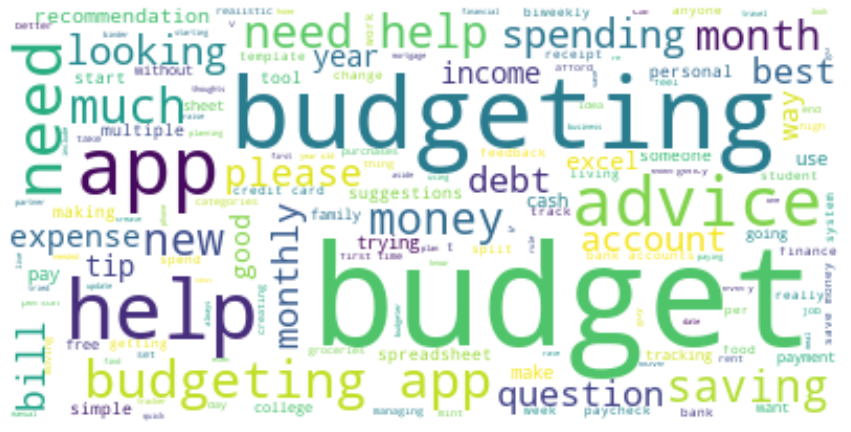

In [79]:
text = " ".join(i for i in df.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()